# Cell distinction by adding a feature (koordinates) to existing KMeans code using HeLa images
By adding this feature it is possible to differentiate between different cells 

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import os # To save images
from matplotlib import colors # To convert image models

In [67]:

from Functions.CellDistinction import preprocess_gray_with_coords
from Functions.FinalKMeans import init_centroids
from Functions.FinalKMeans import assign_to_centroids
from Functions.FinalKMeans import update_centroids
from Functions.CellDistinction import reconstruct_colored_segmentation
from Functions.FinalKMeans import save_image
from Functions.FinalKMeans import save_image_universal
from Functions.CellDistinction import kmeans_with_coords

In [ ]:
gray_t13 = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t13.tif'))
gray_t52 = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t52.tif'))
gray_t75 = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t75.tif'))
gray_t79 = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t79.tif'))

In [ ]:
centroids_gray_t13, labels_gray_t13, differentiated_gray_t13 = kmeans_with_coords(gray_t13, k=5, init_method='kmeans++', space='gray')
centroids_gray_t52, labels_gray_t52, differentiated_gray_t52 = kmeans_with_coords(gray_t52, k=5, init_method='kmeans++', space='gray')
centroids_gray_t75, labels_gray_t75, differentiated_gray_t75 = kmeans_with_coords(gray_t75, k=5, init_method='kmeans++', space='gray')
centroids_gray_t79, labels_gray_t79, differentiated_gray_t79 = kmeans_with_coords(gray_t79, k=5, init_method='kmeans++', space='gray')

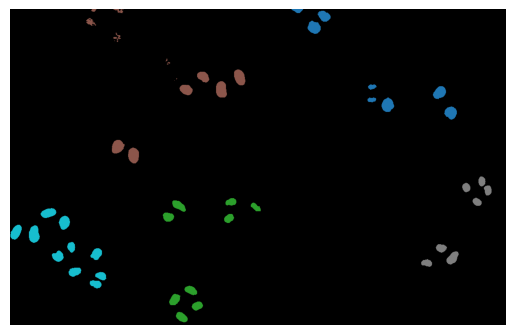

In [70]:
plt.imshow(differentiated_gray_t13)
plt.axis('off')
plt.show()

In [ ]:
#save_image_universal(differentiated_gray_t13, 'Images\Segmented_Images\Differentiated_images\t13', space='gray')

ValueError: unknown file extension: 